In [1]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease (1).csv to Heart_Disease (1).csv


In [3]:
import pandas as pd
file_name = list(uploaded.keys())[0]
heart_data = pd.read_csv(file_name)

heart_data.head()

,sex,age,education,smokingStatus,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHDRisk
0,male,39,4,no,0,0,0,0,no,195,106.0,70.0,26.97,80,77,no
1,female,46,2,no,0,0,0,0,no,250,121.0,81.0,28.73,95,76,no
2,male,48,1,yes,20,0,0,0,no,245,127.5,80.0,25.34,75,70,no
3,female,61,3,yes,30,0,0,1,no,225,150.0,95.0,28.58,65,103,yes
4,female,46,3,yes,23,0,0,0,no,285,130.0,84.0,23.10,85,85,no


In [4]:
heart_data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.00000,3674.000000,3674.000000,3674.000000,3674.000000
mean,49.577300,1.984213,9.092270,0.030212,0.005716,0.310016,236.761840,132.38024,82.906505,25.783038,75.719652,81.769461
std,8.546068,1.022891,11.938399,0.171194,0.075397,0.462563,44.039295,22.04683,11.948024,4.056048,11.957171,23.884454
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.50000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,75.000000,23.080000,68.000000,71.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.00000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,263.000000,143.50000,89.500000,27.990000,82.000000,87.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,600.000000,295.00000,142.500000,56.800000,143.000000,394.000000


In [5]:
missing_values = heart_data.isnull().sum()
missing_percentage = (missing_values / len(heart_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                 Missing Values  Percentage
sex                          11    0.299401
age                           0    0.000000
education                     0    0.000000
smokingStatus                13    0.353838
cigsPerDay                    0    0.000000
BPMeds                        0    0.000000
prevalentStroke               0    0.000000
prevalentHyp                  0    0.000000
diabetes                      0    0.000000
totChol                       0    0.000000
sysBP                         0    0.000000
diaBP                         0    0.000000
BMI                           0    0.000000
heartRate                     0    0.000000
glucose                       0    0.000000
CHDRisk                       0    0.000000


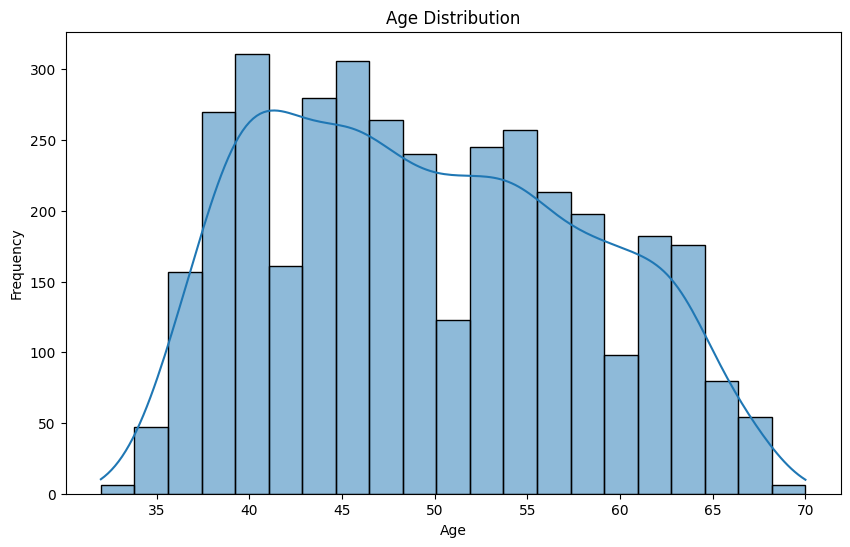

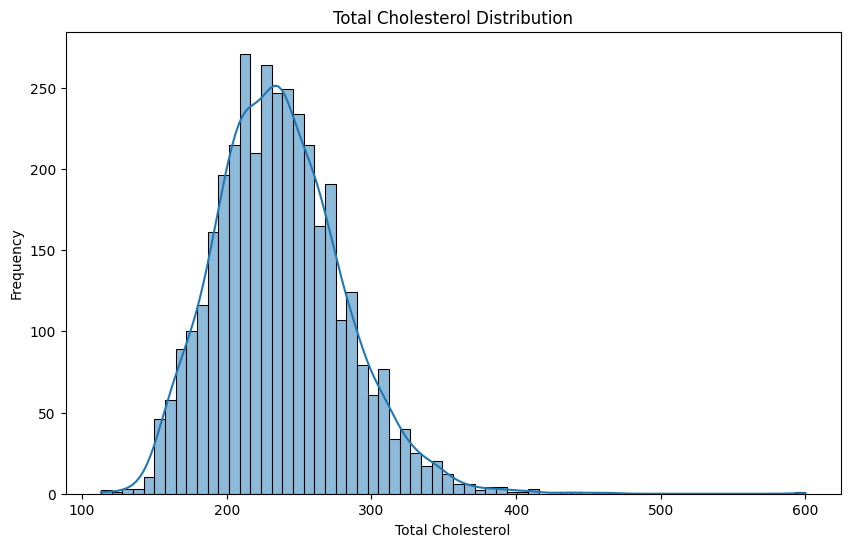

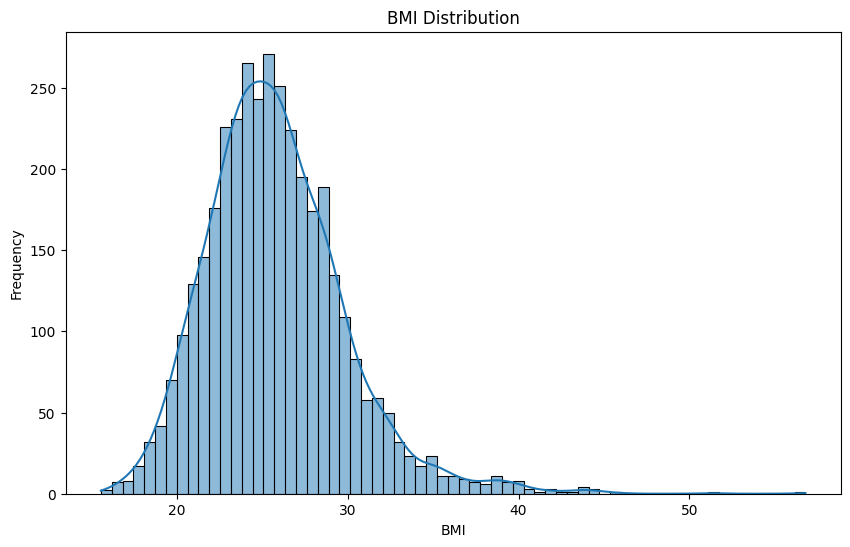

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = heart_data
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Total Cholesterol Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['totChol'], kde=True)
plt.title('Total Cholesterol Distribution')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')
plt.show()

# BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


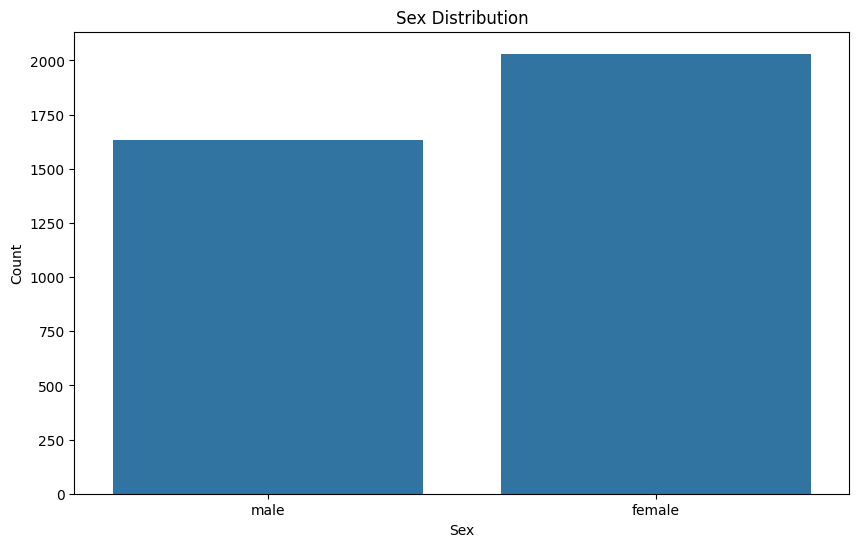

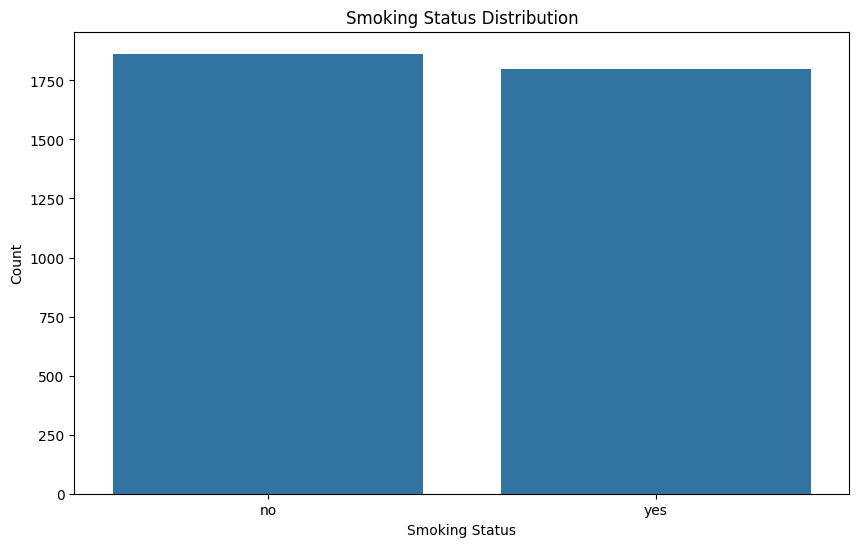

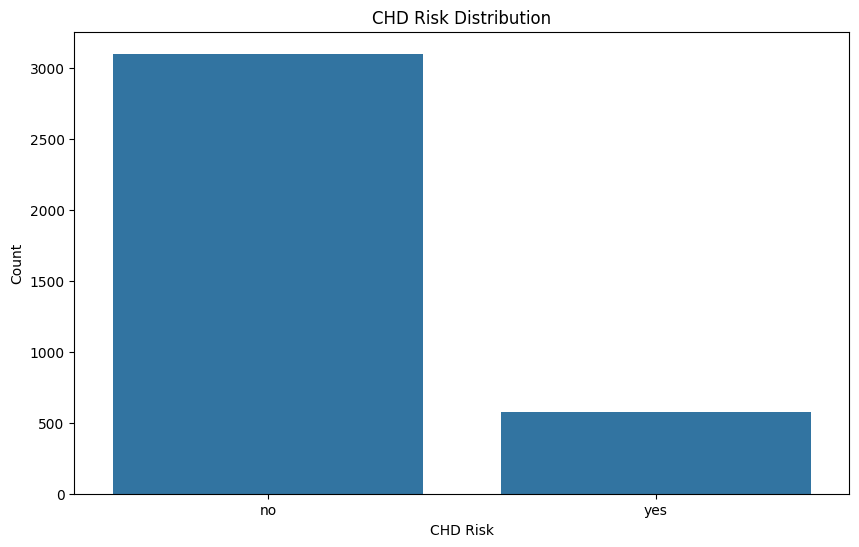

In [8]:
# Sex Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Smoking Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='smokingStatus', data=data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# CHD Risk Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='CHDRisk', data=data)
plt.title('CHD Risk Distribution')
plt.xlabel('CHD Risk')
plt.ylabel('Count')
plt.show()


In [10]:
# Convert categorical variables to appropriate data types
data['sex'] = data['sex'].astype('category')
data['smokingStatus'] = data['smokingStatus'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['CHDRisk'] = data['CHDRisk'].astype('category')


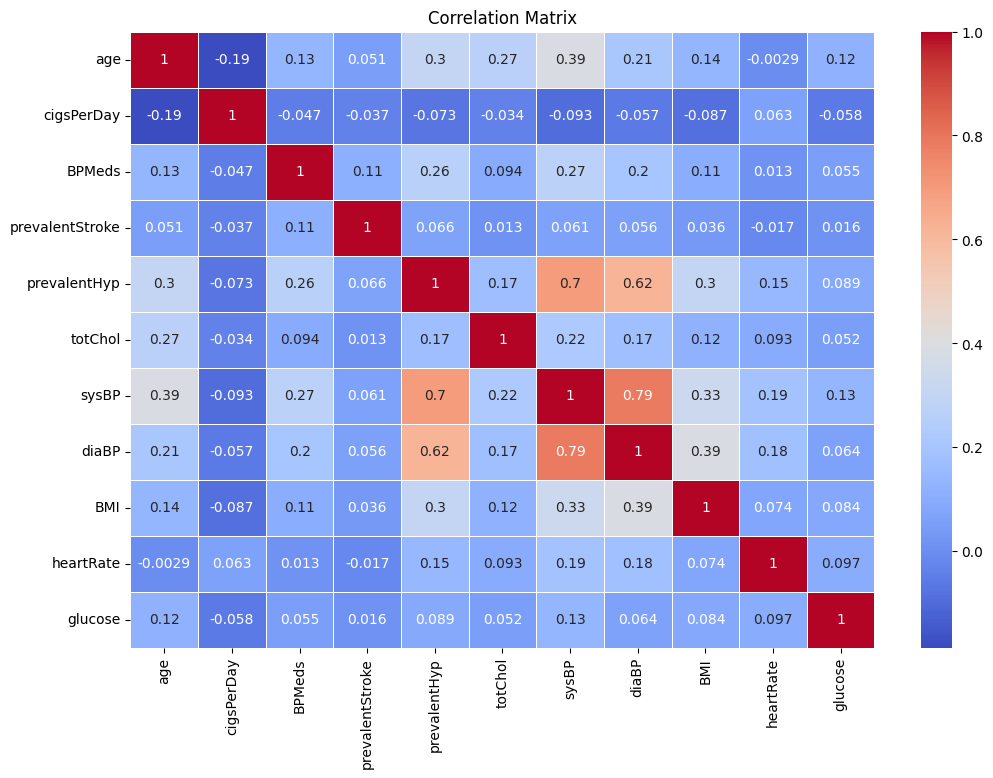

In [12]:
# Select only numerical features for correlation analysis
numerical_features = ['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Sample data
data = heart_data

# Convert categorical variables to appropriate data types
data['sex'] = data['sex'].astype('category')
data['smokingStatus'] = data['smokingStatus'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['CHDRisk'] = data['CHDRisk'].astype('category')

# Define feature columns
features = ['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Preprocessing pipeline
numeric_features = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'smokingStatus', 'diabetes']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_prepared = preprocessor.fit_transform(data[features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

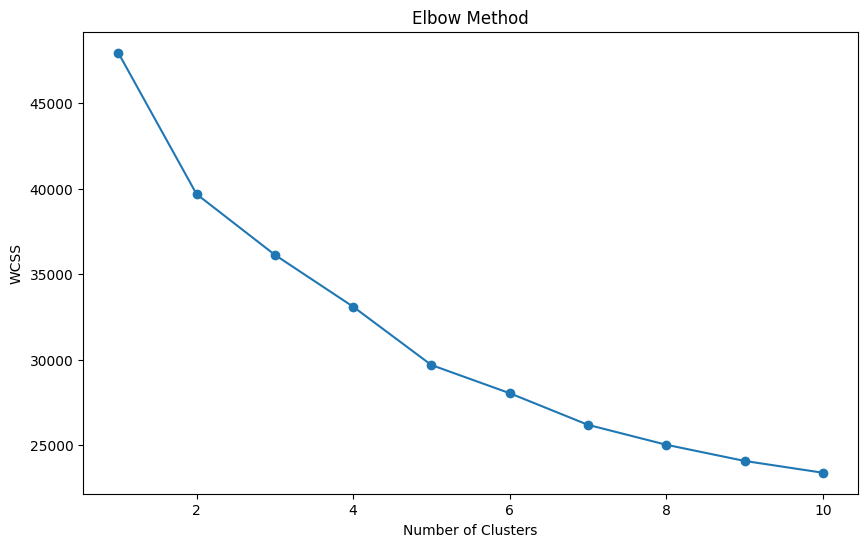

In [14]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_prepared)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


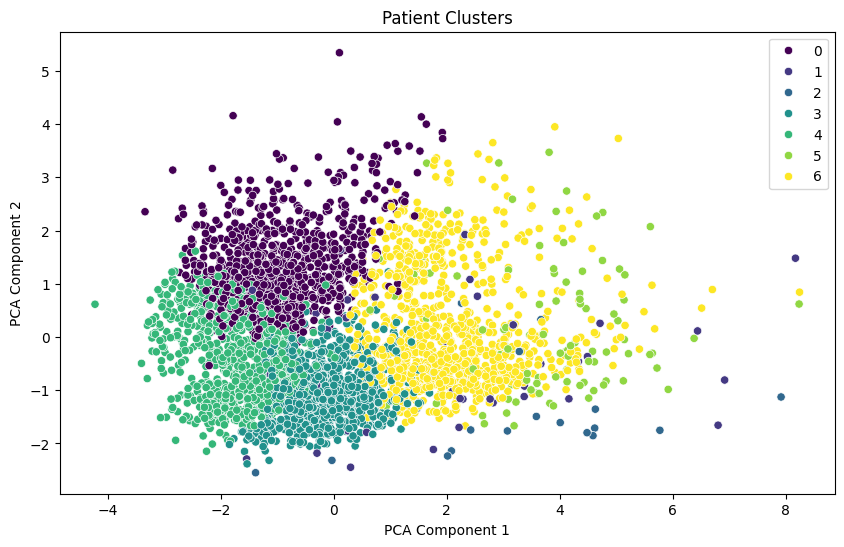

In [20]:
# Apply K-Means with the optimal number of clusters (e.g., 3)
optimal_clusters = 7
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_prepared)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Use PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_prepared)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Patient Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


Logistic Regression Accuracy: 0.83
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          no       0.83      1.00      0.91       607
         yes       0.70      0.05      0.10       128

    accuracy                           0.83       735
   macro avg       0.77      0.52      0.50       735
weighted avg       0.81      0.83      0.77       735

Decision Tree Classifier Accuracy: 0.75
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

          no       0.84      0.86      0.85       607
         yes       0.27      0.25      0.26       128

    accuracy                           0.75       735
   macro avg       0.56      0.55      0.55       735
weighted avg       0.74      0.75      0.75       735

                  Feature  Importance
7                   sysBP    0.145814
9                     BMI    0.129568
0                     age    0.124564
11                glucose   

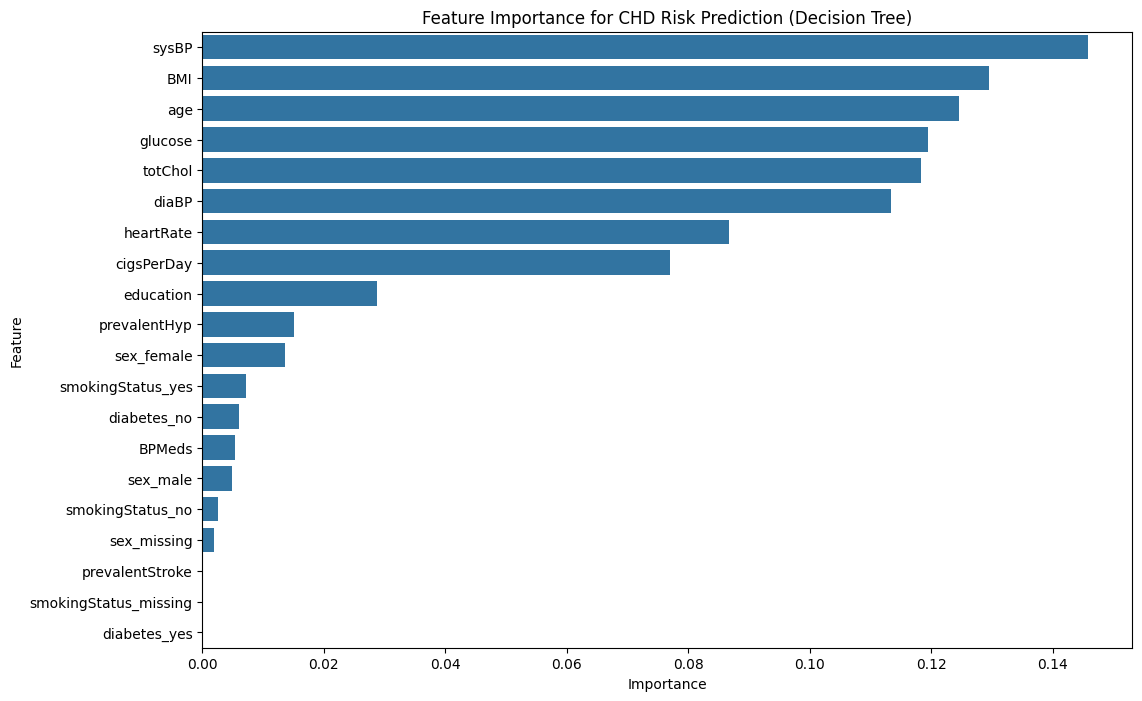

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = heart_data

# Convert categorical variables to appropriate data types
data['sex'] = data['sex'].astype('category')
data['smokingStatus'] = data['smokingStatus'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['CHDRisk'] = data['CHDRisk'].astype('category')

# Define feature columns and target column
features = ['sex', 'age', 'education', 'smokingStatus', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'CHDRisk'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'smokingStatus', 'diabetes']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_prepared, y_train)

# Predict on the test set using Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_prepared)

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.2f}')
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_log_reg))

# Train a Decision Tree Classifier model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_prepared, y_train)

# Predict on the test set using Decision Tree
y_pred_dec_tree = dec_tree.predict(X_test_prepared)

# Evaluate the Decision Tree Classifier model
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
print(f'Decision Tree Classifier Accuracy: {accuracy_dec_tree:.2f}')
print('Decision Tree Classifier Classification Report:')
print(classification_report(y_test, y_pred_dec_tree))

# Feature importance from Decision Tree
feature_importances = dec_tree.feature_importances_
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for CHD Risk Prediction (Decision Tree)')
plt.show()
